![banner cnns ppgcc ufsc](../banner.png)

<a href="https://colab.research.google.com/github/awangenh/vision/blob/master/jupyter/11.3.%20Exemplo%20Completo%20com%20Vis%C3%A3o%20Cl%C3%A1ssica-Logotipos.ipynb"><img align="left"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>&nbsp; &nbsp;<a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/License-CC-BY-ND-4.0-orange.png" alt="Creative Commons 4.0 License" title="Creative Commons 4.0 License"></a>&nbsp; &nbsp; <a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Jupyter-Notebook-v.1.0-blue.png" alt="Jupyter Version" title="Jupyter Version"></a>&nbsp; &nbsp;<a href=""><img align="left"  src="https://img.shields.io/badge/python-3.10-greeng" alt="Python Version" title="Python Version"></a>

# 11.3. Segundo Exemplo Completo com Visão Clássica

Este bloco de notas aqui vai mostrar a você o processo completo de uma pipeline de Visão Computacional: das filtragens iniciais até os métodos de Reconhecimento de Padrões utilizados para a classificação final das características extraídas das imagens multiplamente processadas. 

### Questões sobre o Exercício:

Como este é um exemplo didático, na parte de tranformações e *Imagem -> Imagem* e *Imagem -> Modelo*, nós vamos dretamente da imagem original para uma transformação *Imagem -> Modelo*: **HoG**. Você pode imaginar que usarmos filtros *Imagem -> Imagem* nós podemos melhorar o resultado?

Na parte de *Reconhecimento de Padrões* (transformação de *Modelo -> Modelo* final), nós vamos Treinar e Testar os seguintes métodos de Aprendizado de Máquina Clássico: RF, XGB, kNN, ANN e SVM. Curioso para saber qual vai funcionar melhor?

# 1. Car Logotypes

## 1.1.Identificando logotipos de carros

Neste notebook aqui vamos testar a identificação dos logotipos de carros.

![logotipo de kombi](http://lapix.ufsc.br/wp-content/uploads/2024/05/car-logos.gif)

## 1.2. Dataset Description

O conjunto de dados que vamos usar é uma adaptação do conjunto [Car Brand Logos](https://www.kaggle.com/datasets/volkandl/car-brand-logos) do Kaggle, desenvolvido originalmente por Volkan Özdemir. 

*This data set contains 8 brands' photos. It's divided as train and test images. In training set, there are over 300 images per logo. In test set, there are 63 photos for each.*

![logotipos de carros](http://lapix.ufsc.br/wp-content/uploads/2024/05/car-logos.jpg)

Nós adaptamos o dataset para a disciplina, modficando  sua estrutura para ser compatível com o código do Notebook 11.2, eliminamos imagens muito ruins e imagens de aros de carro com o logotipo no eixo, além de termos normalizado o tamanho das imagens. 
 
 Nós vamos atacar o problema com vários métodos de Visão Computacional clássica e Aprendizad de Máquina classico. 

# 2. Inicializações

## Checando onde você está rodando este bloco de notas...

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

!pwd
!uname -a
!cat /etc/lsb-release

# Test if your notebook is running on Google Colab
# You'll use this when choosing between doing interaction via ipywidgets or not.
try:
    import google.colab
    _ON_COLAB = True
except:
    _ON_COLAB = False

print('Running on Google Colab = ', _ON_COLAB)

/home/awangenh/Documents/Aulas/VC/vision.novo/jupyter
Linux note 6.5.0-28-generic #29~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Apr  4 14:39:20 UTC 2 x86_64 x86_64 x86_64 GNU/Linux
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.4 LTS"
Running on Google Colab =  False


## **Se** você estiver rodando no Colab

### Cloning the ***Computer Vision*** repository from a Git

If you're running this at your computer or using Google Colab but **not** using your Google Drive, this is the way to use these notebooks! Please choose only one of the two Gits below.

In [ ]:
# To clone from our personal Github mirror (may be out of sync):
!git clone https://github.com/awangenh/vision

Cloning into 'vision'...
remote: Enumerating objects: 3454, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 3454 (delta 5), reused 0 (delta 0), pack-reused 3435
Receiving objects: 100% (3454/3454), 368.02 MiB | 24.98 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Updating files: 100% (3528/3528), done.


In [ ]:
# To clone from UFSC's Institutional Gitlab (always the latest version):
!git clone https://codigos.ufsc.br/aldo.vw/vision

### Mova a pasta *data* 

Move ***vision/data*** one level up, into the root folder, so the Anconda-oriented data paths in the next cells will all work properly. If you are running this notebook from a copy of the ***vision*** Git on Anaconda, you **do not** have to do this.

In [ ]:
!ls -al
try:
    import google.colab
    _ON_COLAB = True
except:
    _ON_COLAB = False

if  _ON_COLAB:
    # If you are Running on Google Colab,
    # Move vision/data one level up, into the root folder
    !mv vision/data ..
!ls -al ..

total 20
drwxr-xr-x 1 root root 4096 Nov  3 18:20 .
drwxr-xr-x 1 root root 4096 Nov  3 18:21 ..
drwxr-xr-x 4 root root 4096 Nov  2 13:23 .config
drwxr-xr-x 1 root root 4096 Nov  2 13:24 sample_data
drwxr-xr-x 7 root root 4096 Nov  3 18:21 vision
mv: cannot stat 'vision/data': No such file or directory
total 116
drwxr-xr-x   1 root root  4096 Nov  3 18:21 .
drwxr-xr-x   1 root root  4096 Nov  3 18:21 ..
lrwxrwxrwx   1 root root     7 Jun  5 14:02 bin -> usr/bin
drwxr-xr-x   2 root root  4096 Apr 18  2022 boot
drwxr-xr-x   1 root root  4096 Nov  3 18:20 content
-rw-r--r--   1 root root  4332 Jun 21 00:40 cuda-keyring_1.0-1_all.deb
drwxr-xr-x   8 root root  4096 Nov  3 18:20 data
drwxr-xr-x   1 root root  4096 Nov  2 13:40 datalab
drwxr-xr-x   5 root root   360 Nov  3 18:19 dev
-rwxr-xr-x   1 root root     0 Nov  3 18:19 .dockerenv
drwxr-xr-x   1 root root  4096 Nov  3 18:19 etc
drwxr-xr-x   2 root root  4096 Apr 18  2022 home
lrwxrwxrwx   1 root root     7 Jun  5 14:02 lib -> usr/lib
lrw

### Monte seu Google Drive como uma pasta

If you're using Google Colab together with your Google Drive, adapt this code below to point to the place where you've copied our Git in your Google Drive:

In [ ]:
# Code to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Look at the contents of your Drive:

In [ ]:
!ln -s "/content/drive/My Drive"

# 2.2. Instalações comuns a todos os exercícios

If you are at your computer at home and have installed Anaconda, what needs to be additionally installed?

In [13]:
# Install latest OpenCV with Python Interface using the Python Install Program
!pip3 install opencv-python

# Install the Extreme Gradient Boosting package for Classic Machine Learning
!pip install xgboost

### Common Initializations

In [92]:
%reload_ext autoreload
%autoreload 2

# Make matplotlib draw graphics directly onto the notebook and not in a window
%matplotlib inline

# Importações básicas
import os
import cv2
import numpy as np
from skimage import feature

# Definição de variáveis globais básicas
datapath = "../data/logotipos/"

# 3. Enfoque Clássico - Modelo Binário (Toyota X Volkswagen)

Although Deep learning with Convolutional Neural networks seems to be the best approach for this computer vision problem, we have a limited amount of training data (only 72 images) and we cannot apply data augmentation as it will lead to a distortion of the results. With this in mind we will rather apply the Histogram of Oriented Gradients Image Descriptor with an ensemble method i.e., Random Forest Classifier and Xgboost

## 3.1 Quantifique vetores característicos usando o HoG Descriptor

A função de quantificação possui duas estruturas alternativas dependendo se vamos querer gerar uma visualização do HoG ou somente calcular os vetores de características de histogramas de gradientes orientados.

### 3.1.1. Defina o Tamanho da Célula de Pixels de HoG

Para a geração dos vetores de características HoGianos, a imagem será dividida em células de x@x pixels. O valor ideal de x depende de caracteríticas do conteúdo da imagem e também do tamanho e resolução da imagem. Um bom valor para começar é 12 e é o que vamos usar aqui. Deixamos código com outros valores comuns para você experimentar. 

In [93]:
# Choose the cell_size for your HoG
#cell_size = 8
#cell_size = 10
cell_size = 12
#cell_size = 16
#cell_size = 24
#cell_size = 32

### 3.1.2. Função que calcula HoG para uma imagem

In [94]:
def quantify_image_HoG(image, cell_size=12, visualize=False):
    if visualize:
        # Do not forget to select a cell_size above
        features, hog_image = feature.hog(image, orientations=9,
                               pixels_per_cell=(cell_size, cell_size), cells_per_block=(2, 2),
                               visualize=visualize,
                               transform_sqrt=True, block_norm="L1")

        return features, hog_image
    else:
        features = feature.hog(image, orientations=9,
                               pixels_per_cell=(cell_size, cell_size), cells_per_block=(2, 2),
                               transform_sqrt=True, block_norm="L1")

        return features

HOG is a structural descriptor that will capture and quantify changes in local gradient in the input image. HOG will naturally be able to quantify how the directions of a both spirals and waves change. And furthermore, HOG will be able to capture if these drawings have more of a “shake” to them, as we might expect from a Parkinson’s patient.

The resultant feature vector will then be used to train the classifier

### 3.1.3. A Função abaixo mostra alguns exemplos de HoG

In [95]:
# Do not forget to select a cell_size above
def test_HoG(testingPath, cell_size):
    # Pega a lista de imagens
    testingPaths = list(paths.list_images(testingPath))
    output_images = []
    # Escolhe 20 imagens a acaso
    for _ in range(20):
        imagePath = random.choice(testingPaths)
        # extract the class label from the filename
        label = imagePath.split(os.path.sep)[-2]
        # print(label)
        image = cv2.imread(imagePath)
        output = image.copy()
        output = cv2.resize(output, (128, 128))
        # pre-process the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # quantify the image and make predictions based on the extracted features
        # lembre-se de incluir o parâmetro opcional visualize=True senão não serão 
        # geradas imagens
        hog, hog_image = quantify_image_HoG(image, cell_size, visualize=True)
        # -----------------------------------------
        # Conversão de float para color
        # 1. Multiplicar por 255
        image = hog_image * 255
        # 2. Truncar para inteiro 8 bits
        hog_image = image.astype(np.uint8)
        # 3. Converter para imagem a cores
        hog_image = cv2.cvtColor(hog_image, cv2.COLOR_GRAY2BGR)
        # ----------------------------------------
        # draw the colored class label on the output image and add it to
        # the set of output images
        color = (255, 255, 0) # if label == "Healthy" else (0, 0, 255)
        cv2.putText(hog_image, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    color, 2)
        output_images.append(hog_image)
    plt.figure(figsize=(20, 20))
    for i in range(len(output_images)):
        plt.subplot(5, 5, i+1)
        plt.imshow(output_images[i])
        plt.axis("off")
    plt.show()

### 3.1.4. Mostre os vetores de HoG para algumas imagens do conjunto Multimarcas

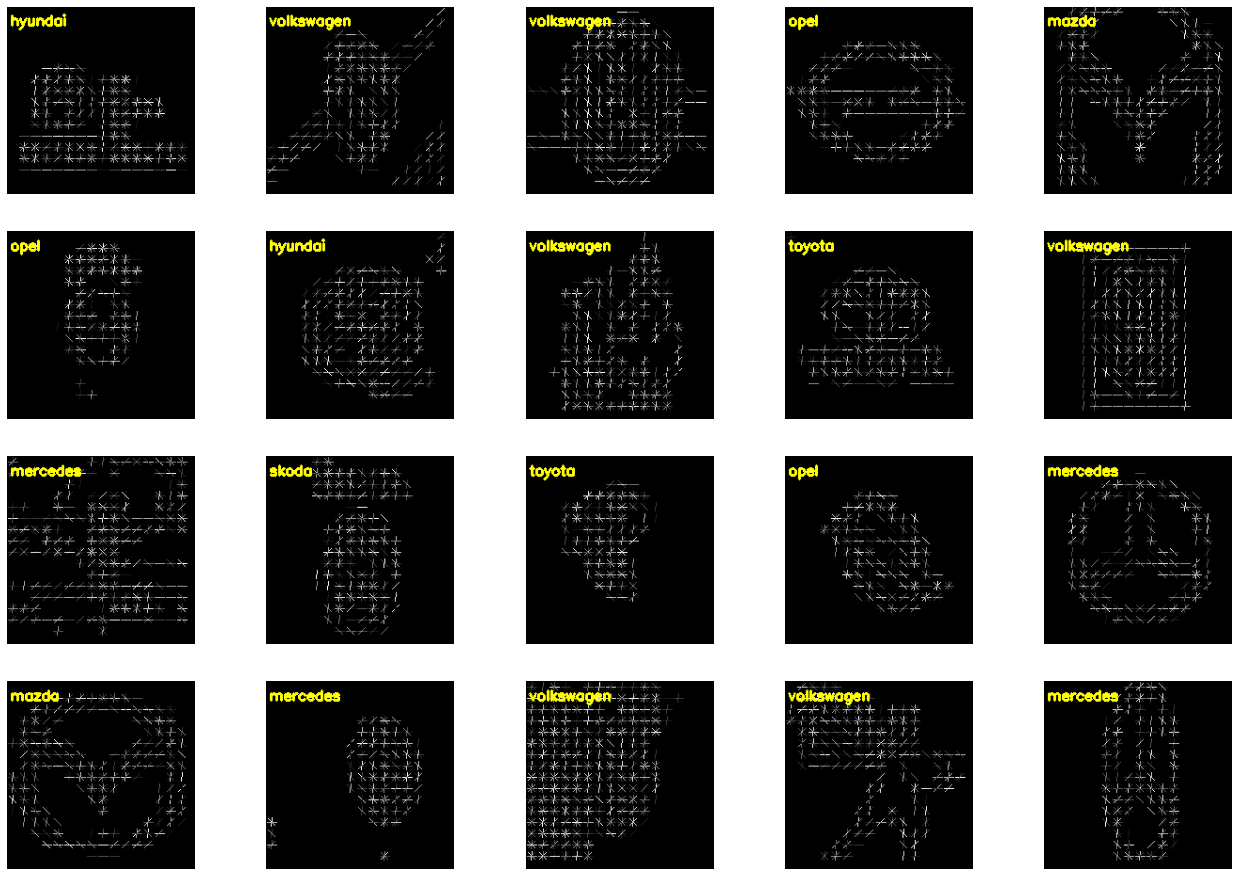

In [96]:
from imutils import paths
import random

testingPath = os.path.sep.join([datapath+'multiplo', "training"])
test_HoG(testingPath, cell_size)

## 3.2 Carregue as imagens e extraia as características com HoG

Vamos aqui definir uma função de carga, preparo e processamento das imagens dos conjuntos de Treino e de Teste. 

Observe que em Aprendizado de Máquina tradicional ainda dividimos os nosso conjuntos diretamente em "**treino**" e "**teste**" e não em treino/validação/teste como em Aprendizado Profundo, onde um conjunto de intermediário, de *Validação*, é usado para fazer testes intermediários cujos resultados vão influenciar os hiperparâmetros do método de AM usado. 



In [97]:
def load_split(path, cell_size):
    # grab the list of images in the input directory, then initialize
    # the list of data (i.e., images) and class labels
    imagePaths = list(paths.list_images(path))
    print('Found ', len(imagePaths),' images in ',path)
    # print('Lista de imagens encontradas:\n', imagePaths)
    data = []
    labels = []
    # loop over the image paths
    for imagePath in imagePaths:
        # extract the class label from the filename
        label = imagePath.split(os.path.sep)[-2]
        # load the input image, convert it to grayscale, and resize
        # it to 200x200 pixels, ignoring aspect ratio
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        # threshold the image such that the drawing appears as white
        # on a black background
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # quantifique a imagem. Aqui usamos o valor default para o parâmetro visualize
        # e assim o parâmetro hog_image não será retornado
        #features, hog_image = quantify_image(image, visualize=True)
        features = quantify_image_HoG(image, cell_size)
        # update the data and labels lists, respectively
        data.append(features)
        labels.append(label)
    return (np.array(data), np.array(labels))

## 3.3 Treinando Métodos de Aprendizado de Máquina Simples

Nós vamos Treinar e Testar os seguintes métodos de Aprendizado de Máquina Clássico:

 * [**Gradient boosting**](https://pt.wikipedia.org/wiki/Gradient_boosting): uma técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um ***ensemble de modelos de previsão fracos, geralmente árvores de decisão*** . Ela constrói o modelo em etapas, como outros métodos de boosting, e os generaliza, permitindo a otimização de uma função de perda diferenciável arbitrária. Para isso vamos usar a biblioteca [**Xgboost**](https://pt.wikipedia.org/wiki/Xgboost) - "Extreme Gradient Boosting", um framework de "gradient boosting" para C++, Java, Python, R e Julia, Perl, e Scala. Ele é especialmente conhecido por sua capacidade de fornecer modelos de alta performance em problemas de classificação e regressão.Aqui estão algumas características e benefícios do XGBoost:

    Eficiência: O XGBoost é otimizado para velocidade e desempenho, sendo significativamente mais rápido do que muitas outras implementações de árvores de decisão e boosting.

    Regularização: Ele oferece suporte a técnicas avançadas de regularização, como regulação L1 e L2, o que ajuda a evitar overfitting e melhora a generalização do modelo.

    Manipulação de Dados Esparsos: XGBoost é eficiente na manipulação de dados esparsos, o que o torna adequado para problemas com grandes conjuntos de dados e muitas características.

    Capacidade de customização: Oferece uma ampla gama de parâmetros ajustáveis que permitem customizar o comportamento do modelo de acordo com as necessidades do problema.

    Alta Performance: XGBoost é frequentemente o vencedor de competições de ciência de dados e é amplamente utilizado em aplicações do mundo real devido à sua capacidade de produzir modelos altamente precisos.

   XGBoost tornou-se uma escolha popular para cientistas de dados e praticantes de aprendizado de máquina em várias indústrias devido à sua combinação de desempenho, flexibilidade e eficácia.
 
 * [**Classificador de Floresta Aleatória**](https://en.wikipedia.org/wiki/Random_forest) ou *Random Forest Classifier* é um método de Aprendizado de Máquina de [*ensemble learning*](https://en.wikipedia.org/wiki/Ensemble_learning) (ou aprendizado por conjunto de classificadores) que irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação.

![RF](random-forest.jpg)

 * [**Rede Neural Artificial Backpropagation**](https://en.wikipedia.org/wiki/Feedforward_neural_network) é um método bem conhecido de AM. Usamos a implementação do SKLearn descrita aqui: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
 
 * Referência de kNN do SciKit: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html Como o kNN está aqui para comparação, vamos usar apenas valores *default* na criação da instância do classificador (*k*=5). 
 
 
 
 * **SVM (Support Vector Machine)** é um algoritmo de aprendizado de máquina supervisionado usado para tarefas de classificação e regressão. Ele é eficaz na construção de modelos que podem realizar tanto classificação linear quanto não linear.

    A ideia principal por trás do SVM é encontrar um hiperplano em um espaço de características (um espaço multidimensional onde cada instância é representada por um vetor) que melhor separa as classes. Quando as classes não podem ser perfeitamente separadas por um hiperplano, o SVM utiliza truques matemáticos para mapear os dados em um espaço de características de dimensão superior, onde uma separação linear é possível. Alguns pontos-chave sobre SVM:

    Margem Máxima: O SVM procura o hiperplano que maximiza a margem, que é a distância entre o hiperplano e as instâncias mais próximas de cada classe. Maximizar a margem geralmente leva a modelos mais robustos e com melhor capacidade de generalização.

    Vetores de Suporte: São as instâncias de treinamento que estão mais próximas do hiperplano de separação. Estas instâncias são fundamentais na definição do hiperplano e, portanto, no desempenho do modelo.

    Kernel Trick: Quando as classes não podem ser separadas linearmente no espaço de características original, o SVM pode aplicar o kernel trick para mapear os dados em um espaço de características de dimensão superior onde a separação linear é possível. Isso permite que o SVM lide com problemas não lineares.

    Os SVMs são usados em uma variedade de aplicações, incluindo reconhecimento de padrões, bioinformática, reconhecimento de voz, entre outros. Eles são populares devido à sua eficácia em problemas de classificação, mesmo em conjuntos de dados complexos e de alta dimensionalidade.


In [98]:
from imutils import paths
from sklearn.preprocessing import LabelEncoder

# Importar classificador de floresta aleatória
from sklearn.ensemble import RandomForestClassifier

# Importar classificador de vizinho mais próximo
from sklearn.neighbors import KNeighborsClassifier

# Importar família de classificadores de máquina de vetores de suporte
from sklearn import svm

# Importar classificador de gradient boosting
from xgboost import XGBClassifier

# Importar Rede Neural Artifical BP Clássica
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### 3.3.1. Função de treinamento

Já falmos dos *métodos de ensemble*. Além de RF e XGB, vamos usar também kNN para termos uma baseline "bobinha" e poder discutir se valeu ou não ser complicado... Além disso vamos também usar SVM e Redes Neurais Artificiais Backpropagation tradicionais. 

Ao todo teremos uma comparação de 5 classificadores "clássicos". 

In [99]:
def train_models_logotype(mode):
    # Set Hidden Layer sizes for the ANN
    if mode == 'binario':
        hidden_layers = (16, 2)
    else:
        hidden_layers = (32, 8)
    print('Training ML models for a HoG cell_size of ', cell_size)
    # initialize the models
    models = {
        # Métodos de ensemble (ou aprendizado por conjunto de classificadores)
        "Rf": {
            "classifier": RandomForestClassifier(random_state=1),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
            "predictions": 0,
            "cm":0,
            "classes":0,
            "auc_score":0,
            "fpr":0,
            "tpr":0,
            "thresh":0
        },
        "Xgb": {
            "classifier": XGBClassifier(),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
            "predictions": 0,
            "cm":0,
            "classes":0,
            "auc_score": 0,
            "fpr":0,
            "tpr":0,
            "thresh":0
        },
        # Método bobinho de vizinho mais próximo para baseline
        "kNN": {
            "classifier": KNeighborsClassifier(),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
            "predictions": 0,
            "cm":0,
            "classes":0,
            "auc_score": 0,
            "fpr":0,
            "tpr":0,
            "thresh":0
        },
         # Máquina de vetores de suporte
        "svm": {
            "classifier": svm.SVC(decision_function_shape='ovo', probability=True),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
            "predictions": 0,
            "cm":0,
            "classes":0,
            "auc_score": 0,
            "fpr":0,
            "tpr":0,
            "thresh":0
        },
         # Rede Neural Artificial BP Clássica
        "ann": {
            "classifier": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=hidden_layers, 
                                        max_iter=1000, random_state=1),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
            "predictions": 0,
            "cm":0,
            "classes":0,
            "auc_score": 0,
            "fpr":0,
            "tpr":0,
            "thresh":0
        }
    }
    # define the path to the testing and training directories
    # path = datapath + mode
    path = datapath + mode
    trainingPath = os.path.sep.join([path, "training"])
    print('Training images path:', trainingPath)
    testingPath = os.path.sep.join([path, "testing"])
    print('Testing images path:', testingPath)
    # carregue as imagens de treino
    (trainX, trainY) = load_split(trainingPath, cell_size)
    # carregue as imagens de teste
    (testX, testY) = load_split(testingPath, cell_size)

    classNames = set(testY)
    type(classNames)
    classNames = list(classNames)
    print(classNames)

    # codifique os rótulos
    le = LabelEncoder()
    # codifique os rótulos de treino
    trainY = le.fit_transform(trainY)
    # codifique os rótulos de teste
    testY = le.transform(testY)
    # train each model and calculate its metrics
    for model in models:
        print('Training model: ', model)
        models[model]["classifier"].fit(trainX, trainY)
        predictions = models[model]["classifier"].predict(testX)
        predictions_probs = models[model]["classifier"].predict_proba(testX)
        cm = confusion_matrix(testY, predictions)
        models[model]["predictions"] = predictions
        models[model]["cm"] = cm
        models[model]["classes"] = classNames
        if mode == 'binario':
            fpr, tpr, thresh = roc_curve(testY, predictions_probs[:,1])
            models[model]["fpr"] = fpr
            models[model]["tpr"] = tpr
            models[model]["thresh"] = thresh
            tn, fp, fn, tp = cm.ravel()
            models[model]["accuracy"] = (tp + tn) / float(cm.sum())
            models[model]["sensitivity"] = tp / float(tp + fn)
            models[model]["specificity"] = tn / float(tn + fp)
            models[model]["auc_score"] = roc_auc_score(testY, predictions_probs[:,1])
    return models

### 3.3.2. Curva ROC

Vamos criar uma Curva ROC Múltipla, mas onde cada curva representa a performance de um modelo de classificação e não uma classe. É um gráfico binário apenas, mas para vários modelos. Você pode criar uma curva ROC Multiclasse também, mas não é o que estamos fazendo aqui. 

A [*Curva Característica de Operação do Receptor* (Curva COR), ou, do inglês, *Receiver Operating Characteristic Curve* (ROC curve), ou, simplesmente, **curva ROC**](https://pt.wikipedia.org/wiki/Caracter%C3%ADstica_de_Opera%C3%A7%C3%A3o_do_Receptor), é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário à medida que o seu limiar de discriminação varia. Ela representa a taxa de verdadeiros positivos (TPR) versus a taxa de falsos positivos (FPR) em vários pontos de corte. A curva ROC é também conhecida como curva de característica de operação relativa, porque o seu critério de mudança é resultado da operação de duas características (PV e PF). 

* A taxa de verdadeiros positivos (TP), também conhecida como sensibilidade, é a proporção de instâncias positivas corretamente classificadas em relação ao total de instâncias positivas.
* A taxa de falsos positivos (FP) é a proporção de instâncias negativas incorretamente classificadas como positivas em relação ao total de instâncias negativas.

A curva ROC é traçada com TP no eixo y e FP no eixo x. Quanto mais a curva se aproxima do canto superior esquerdo do gráfico, melhor é o desempenho do modelo, pois indica uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos. A área sob a curva ROC (AUC) é frequentemente usada como uma medida agregada do desempenho do modelo, onde um AUC de 1 representa um modelo perfeito e 0.5 representa um desempenho aleatório.


In [101]:
# Plot ROC curve
def plot_roc_curve(model, figname):
    plt.style.use("fivethirtyeight")
    
    fpr_rf = model["Rf"]["fpr"]
    tpr_rf = model["Rf"]["tpr"]
    auc_score_rf =model["Rf"]["auc_score"]
    
    fpr_xgb = model["Xgb"]["fpr"]
    tpr_xgb = model["Xgb"]["tpr"]
    auc_score_xgb =model["Xgb"]["auc_score"]
    
    fpr_knn = model["kNN"]["fpr"]
    tpr_knn = model["kNN"]["tpr"]
    auc_score_knn =model["kNN"]["auc_score"]
    
    fpr_svm = model["svm"]["fpr"]
    tpr_svm = model["svm"]["tpr"]
    auc_score_svm =model["svm"]["auc_score"]
    
    fpr_ann = model["ann"]["fpr"]
    tpr_ann = model["ann"]["tpr"]
    auc_score_ann =model["ann"]["auc_score"]
    
    plt.figure(figsize=(15, 15))
    plt.title('Receiver Operating Characteristic (ROC curve/sensibility)')
    
    plt.plot(fpr_rf, tpr_rf, color = 'blue', label = 'Random Forest AUC = {:.2f}'.format(auc_score_rf))
    plt.plot(fpr_xgb, tpr_xgb, color = 'green', label = 'Xgboost AUC = {:.2f}'.format(auc_score_xgb))
    plt.plot(fpr_knn, tpr_knn, color = 'orange', label = 'kNN AUC = {:.2f}'.format(auc_score_knn))
    plt.plot(fpr_svm, tpr_svm, color = 'yellow', label = 'SVM AUC = {:.2f}'.format(auc_score_svm))
    plt.plot(fpr_ann, tpr_ann, color = 'violet', label = 'ANN AUC = {:.2f}'.format(auc_score_svm))
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.1, 1])
    plt.ylim([0, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(figname, dpi = 300)
    plt.show()

In [102]:
# Treine os modelos usando a coleção de logotipos binaria Toyota X Volkswagen
logotypeModels = train_models_logotype('binario')

Training ML models for a HoG cell_size of  12
Training images path: ../data/logotipos/binario/training
Testing images path: ../data/logotipos/binario/testing
Found  584  images in  ../data/logotipos/binario/training
Found  94  images in  ../data/logotipos/binario/testing
['volkswagen', 'toyota']
Training model:  Rf
Training model:  Xgb
Training model:  kNN
Training model:  svm
Training model:  ann


## 3.4 Performance dos Modelos

### 3.4.1. Logotipos Binário Toyota X Volkswagen

In [103]:
print("Comparação de classificadores: Random Forest x XGBoost x kNN x SVM x ANN\n")
for metric in ("accuracy", "sensitivity", "specificity", "auc_score"):
    print(f"{metric.capitalize()}: ")
    print("Random Forest={:.2f}%, XGBoost={:.2f}%, kNN={:.2f}%,  svm={:.2f}%,  ann={:.2f}% \n".format(
        logotypeModels['Rf'][metric]*100, 
        logotypeModels['Xgb'][metric]*100, 
        logotypeModels['kNN'][metric]*100, 
        logotypeModels['svm'][metric]*100,
        logotypeModels['ann'][metric]*100))

Comparação de classificadores: Random Forest x XGBoost x kNN x SVM x ANN

Accuracy: 
Random Forest=80.85%, XGBoost=80.85%, kNN=67.02%,  svm=72.34%,  ann=78.72% 

Sensitivity: 
Random Forest=79.55%, XGBoost=84.09%, kNN=84.09%,  svm=75.00%,  ann=84.09% 

Specificity: 
Random Forest=82.00%, XGBoost=78.00%, kNN=52.00%,  svm=70.00%,  ann=74.00% 

Auc_score: 
Random Forest=88.36%, XGBoost=90.14%, kNN=75.09%,  svm=84.09%,  ann=82.27% 



### 3.4.2. Curva ROC (Binário Toyota X Volkswagen)

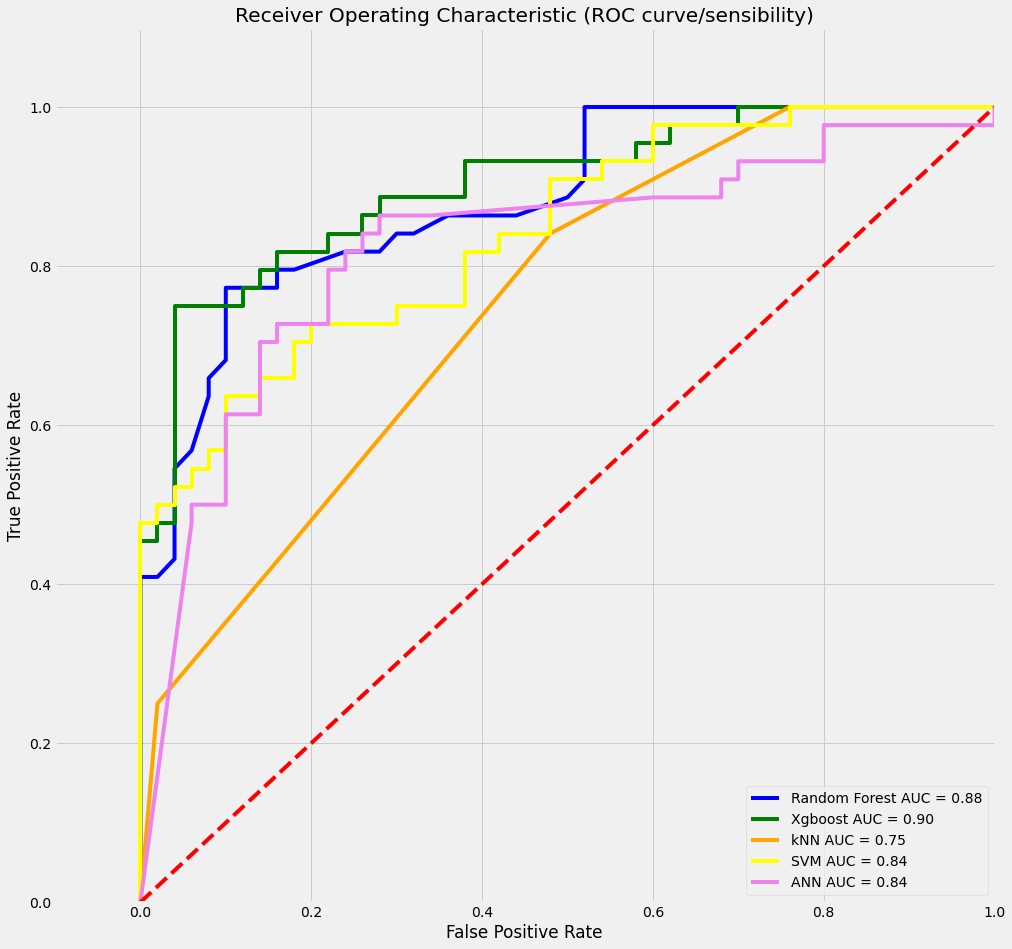

In [104]:
plot_roc_curve(logotypeModels, 'binario')

### 3.4.3. Matrizes de Confusão por Modelo de ML (Binário Toyota X Volkswagen)

Uma matriz de confusão (*confusion matrix*) é uma tabela usada em problemas de classificação para avaliar o desempenho de um modelo preditivo. Ela mostra a quantidade de verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN) resultantes das previsões do modelo em relação aos rótulos verdadeiros.

* Verdadeiros Positivos (TP): São os casos em que o modelo previu corretamente uma classe positiva.
* Falsos Positivos (FP): São os casos em que o modelo previu incorretamente uma classe positiva (quando na verdade era negativa).
* Verdadeiros Negativos (TN): São os casos em que o modelo previu corretamente uma classe negativa.
* Falsos Negativos (FN): São os casos em que o modelo previu incorretamente uma classe negativa (quando na verdade era positiva).

A matriz de confusão organiza esses resultados em uma tabela onde as linhas representam as classes reais e as colunas representam as classes previstas pelo modelo. Ela permite uma visualização rápida e clara do desempenho do modelo em termos de sua capacidade de distinguir entre as diferentes classes. Com base nos valores na matriz de confusão, várias métricas de avaliação podem ser calculadas, como precisão, recall, F1-score e taxa de erro.

Para olhar como o modelo se comporta vamos nos valer de uma *matriz de confusão binária*:

![logotipo de kombi](http://lapix.ufsc.br/wp-content/uploads/2024/05/cm2.png)

Rf  ACC:  0.8085106382978723


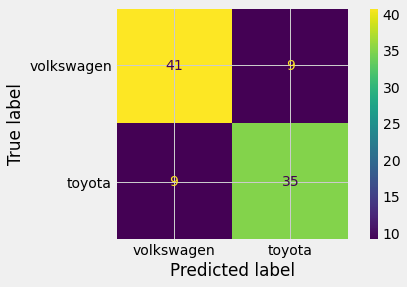

Xgb  ACC:  0.8085106382978723


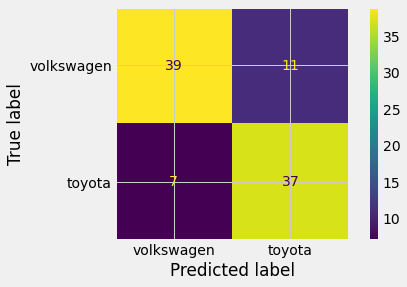

kNN  ACC:  0.6702127659574468


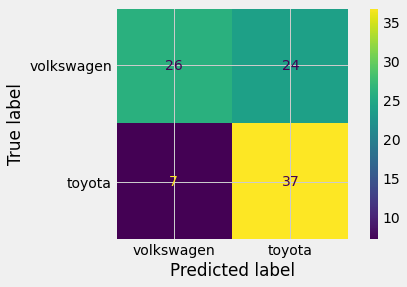

svm  ACC:  0.723404255319149


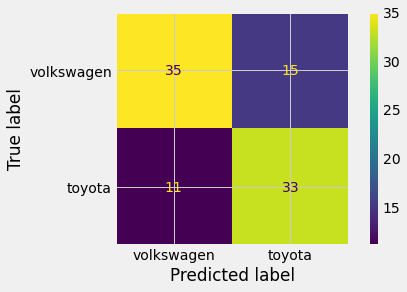

ann  ACC:  0.7872340425531915


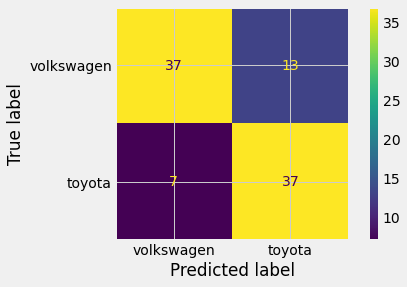

In [105]:
# Plot Confusion Matrices for each ML Model
from sklearn.metrics import ConfusionMatrixDisplay

for model in logotypeModels:
    print(model, ' ACC: ', logotypeModels[model]["accuracy"])
    confusionMatrix = logotypeModels[model]["cm"]
    disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, 
                                  display_labels=logotypeModels[model]["classes"])
    disp.plot()
    plt.show()

# 4. Testando em Amostras de Imagens do Modelo Binário

Visualize the predictions

In [106]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

## 4.1. Função que realiza predições sobre imagens aleatórias do conjunto de teste:

In [109]:
def test_prediction(model, testingPath):
    # get the list of images
    testingPaths = list(paths.list_images(testingPath))
    output_images = []
    # Escolha 20 imagens ao acaso
    for _ in range(20):
        image = cv2.imread(random.choice(testingPaths))
        output = image.copy()
        output = cv2.resize(output, (128, 128))
        # pre-process the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # quantify the image and make predictions based on the extracted features
        features, hog_image = quantify_image_HoG(image, cell_size, visualize=True)
        preds = model.predict([features])
        label = "Volkswagen" if preds[0] else "Toyota"

        # draw the colored class label on the output image and add it to
        # the set of output images
        color = (0, 200, 0) if label == "Healthy" else (255, 0, 0)
        cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    color, 2)
        output_images.append(output)
    plt.figure(figsize=(20, 20))
    for i in range(len(output_images)):
        plt.subplot(5, 5, i+1)
        plt.imshow(output_images[i])
        plt.axis("off")
    plt.show()

## 4.2 Figuras de Logotipos

Escolha o modelo de Aprendizado de Máquina que você vai usar na segunda linha da célula: 

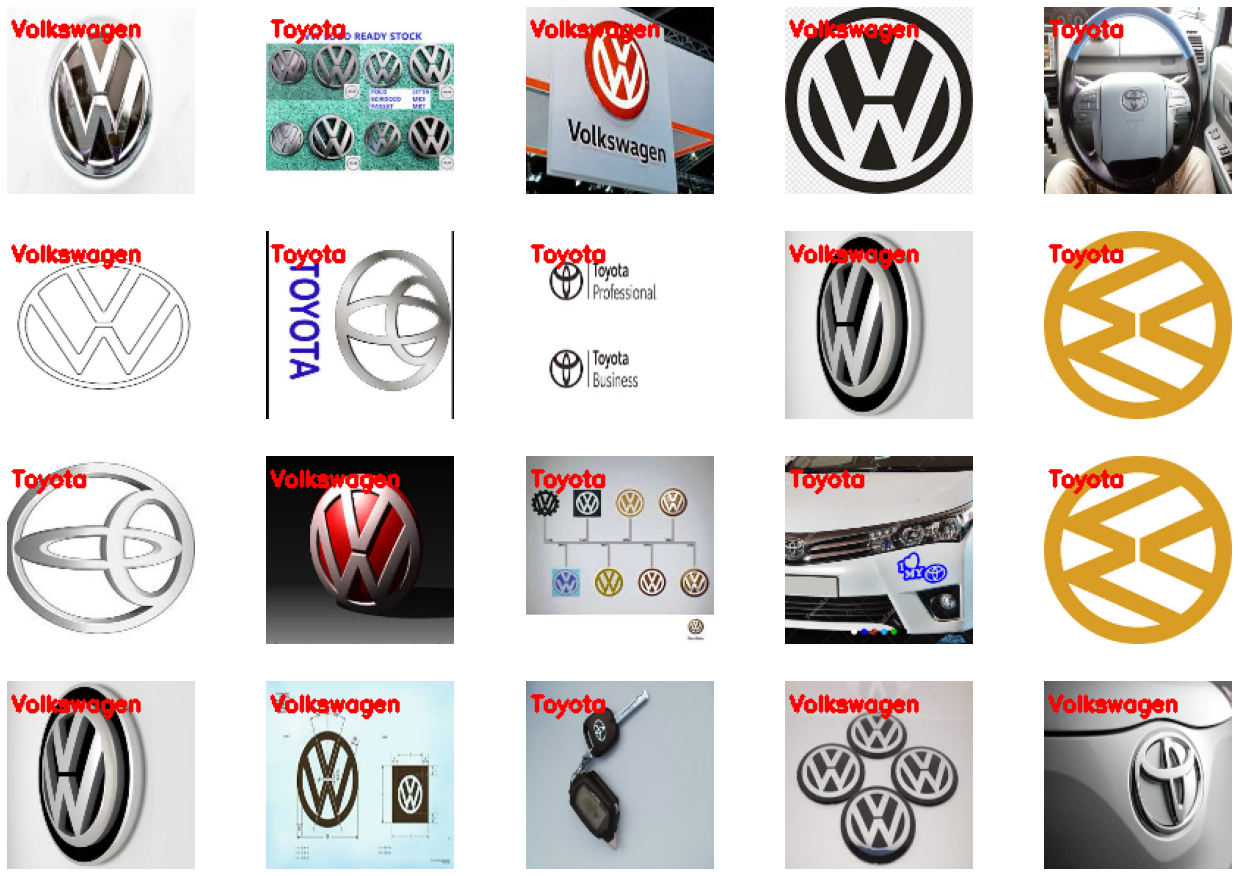

In [110]:
testingPath = os.path.sep.join([datapath+"/binario", "testing"])
test_prediction(logotypeModels['Rf']['classifier'], testingPath)

# 5. Enfoque Clássico - Modelo Multiclasse (8 classes de logotipos)

Nesta versão vamos trabalhar om 8 classes de logotipos: Hyundai, Lexus, Mazda, Merceds, Opel, Skoda, Toyota e Volkswagen. Para isso vamoster de modifica um pouco o códig, que até agora, no Parkinson e no problema Toyota X Volkswagen, era customizado para apenas duas classes.

## 5.1. Imagens Multimarcas

Primeiramente treinamos métodos de ML multiclasse. São os memsos métodos do exemplo anterior, apenas com alguns parâmetros alterados:

In [111]:
# Treine os modelos usando a coleção de logotipos multimarcas 
logotypeMultiModels = train_models_logotype('multiplo')

Training ML models for a HoG cell_size of  12
Training images path: ../data/logotipos/multiplo/training
Testing images path: ../data/logotipos/multiplo/testing
Found  2286  images in  ../data/logotipos/multiplo/training
Found  356  images in  ../data/logotipos/multiplo/testing
['volkswagen', 'skoda', 'mercedes', 'mazda', 'toyota', 'lexus', 'hyundai', 'opel']
Training model:  Rf
Training model:  Xgb
Training model:  kNN
Training model:  svm
Training model:  ann


## 5.2. Performance do Modelo para o Dataset Multimarcas

Para olhar como o modelo se comporta vamos nos valer de uma *matriz de confusão multiclasse*:

![logotipo de kombi](http://lapix.ufsc.br/wp-content/uploads/2024/05/mc-cm.png)

Rf


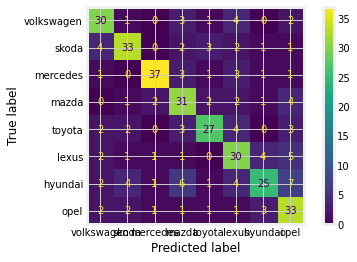

Xgb


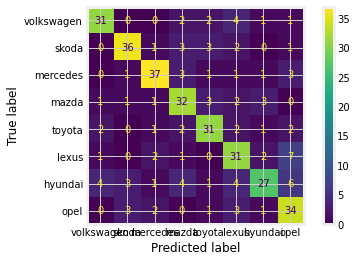

kNN


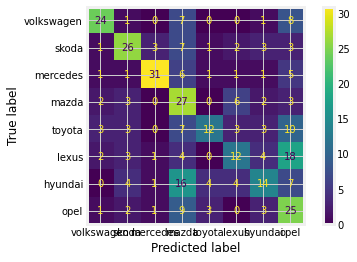

svm


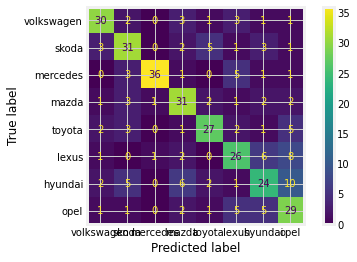

ann


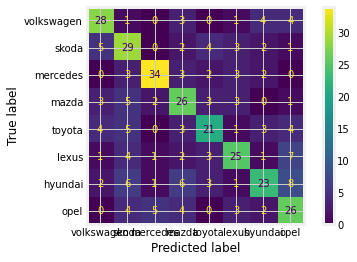

In [114]:
# Plot Confusion Matrices for each ML Model
from sklearn.metrics import ConfusionMatrixDisplay

for model in logotypeMultiModels:
    print(model)
    confusionMatrix = logotypeMultiModels[model]["cm"]
    disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, 
                                  display_labels=logotypeMultiModels[model]["classes"])
    disp.plot()
    plt.show()

# 6. Save the models for later use

In [28]:
import joblib

In [29]:
filename = os.path.join("../models/", "random_forest_spiral_model.pkl")
joblib.dump(spiralModels['Rf']['classifier'], filename)

['../models/random_forest_spiral_model.pkl']

In [31]:
filename = os.path.join("../models/", "random_forest_wave_model.pkl")
joblib.dump(waveModels['Rf']['classifier'], filename)

['../models/random_forest_wave_model.pkl']

## 6.1 Test If models have been saved succesfully

In [32]:
filename = os.path.join("../models/", "random_forest_spiral_model.pkl")
spiralmodel = joblib.load(filename)

In [ ]:
testingPath = os.path.sep.join(["../data/parkinson-dataset/spiral", "testing"])
test_prediction(spiralmodel, testingPath)

In [34]:
filename = os.path.join("../models/", "random_forest_wave_model.pkl")
waveModel = joblib.load(filename)

In [ ]:
testingPath = os.path.sep.join(["../data/parkinson-dataset/wave", "testing"])
test_prediction(waveModel, testingPath)

##### Sucess 😁

![banner cnns ppgcc ufsc](https://lapix.ufsc.br/wp-content/uploads/2022/10/rodape-CC.png)